In [1]:
from torchvision.datasets import FashionMNIST as fm
from torchvision import transforms

img_transform = transforms.Compose([
    transforms.ToTensor()
])

data_root = '../torchvision/data'
fm_train = fm(root = data_root, train = True, download = False, transform = img_transform)

fm_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../torchvision/data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

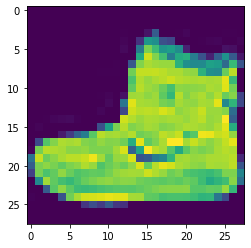

In [2]:
import matplotlib.pyplot as plt

sample = next(iter(fm_train))
image, label = sample

plt.imshow(image.squeeze())

In [3]:
from torch.utils.data import DataLoader
train_data = DataLoader(fm_train, batch_size = 100, shuffle = False)

In [4]:
import torch
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 20),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(20, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.LeakyReLU(negative_slope=0.01)
        )
    def forward(self,x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return encoder, decoder

model = AutoEncoder()

In [5]:
criterion = nn.MSELoss(reduction = 'mean')
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
epoch = 20
losses= []

In [6]:
from torch.autograd import Variable
import numpy as np

for e in range(epoch):
    for in_data, _ in train_data:
        in_data = in_data.view(in_data.shape[0], -1)
        in_data = Variable(in_data)
        _, out_data = model(in_data)
        
        loss = criterion(out_data, in_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data)
    print('epoch is: {}, Loss is:{:.4f}'.format(e + 1, loss.data))

epoch is: 1, Loss is:0.0217
epoch is: 2, Loss is:0.0188
epoch is: 3, Loss is:0.0171
epoch is: 4, Loss is:0.0154
epoch is: 5, Loss is:0.0141
epoch is: 6, Loss is:0.0132
epoch is: 7, Loss is:0.0125
epoch is: 8, Loss is:0.0121
epoch is: 9, Loss is:0.0118
epoch is: 10, Loss is:0.0115
epoch is: 11, Loss is:0.0112
epoch is: 12, Loss is:0.0111
epoch is: 13, Loss is:0.0109
epoch is: 14, Loss is:0.0107
epoch is: 15, Loss is:0.0107
epoch is: 16, Loss is:0.0105
epoch is: 17, Loss is:0.0103
epoch is: 18, Loss is:0.0102
epoch is: 19, Loss is:0.0103
epoch is: 20, Loss is:0.0100


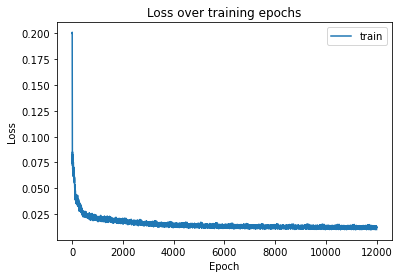

In [7]:
ax = plt.figure().gca()
ax.plot(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'])
plt.title('Loss over training epochs')
plt.show()

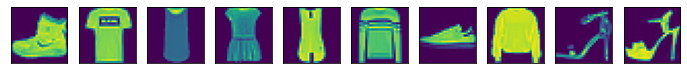

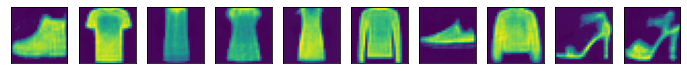

In [8]:
def show_fm(images):
    _, figs = plt.subplots(1, len(images), figsize = (12,12))
    for f, img in zip(figs, images):
        f.imshow(img.squeeze())
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
    
samples_in, samples_out = [], []
for i in range(10):
    samples_in.append(fm_train[i][0])
    _, sample_out = model((fm_train[i][0]).view(-1, 784))
    sample_out = sample_out.view(28, -1).detach().numpy()
    samples_out.append(sample_out)
show_fm(samples_in)
show_fm(samples_out)